In [370]:
import numpy as np

In [371]:
np.random.seed(42)

def y(x):
    return 3*x - 3

n = 10
x = np.random.uniform(low = 0, high = 20, size = n)
x = np.sort(x)
true_z = y(x)

In [372]:
true_x = x

In [373]:
print(np.sort(x))

[ 1.16167224  3.11989041  3.12037281  7.49080238 11.97316968 12.02230023
 14.16145156 14.63987884 17.32352292 19.01428613]


In [374]:
print(np.sort(true_z))

[ 0.48501673  6.35967122  6.36111843 19.47240713 32.91950905 33.0669007
 39.48435467 40.91963651 48.97056875 54.04285838]


In [375]:
a = -3
b = 1
d = 3

d1 = np.sqrt(a**2+b**2)
ad1 = a/d1
bd1 = b/d1
dd1 = d/d1

In [376]:
dd1

0.9486832980505138

In [377]:
w = np.random.normal(0, 1, size = n)
e = np.random.normal(0, 3, size = n)
x = x + w
z = true_z + e

In [378]:
print(w)

[-0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024
 -1.72491783 -0.56228753 -1.01283112  0.31424733]


In [379]:
print(np.sort(z))

[-2.2390555   2.12276012 10.75806473 18.79507823 28.79265615 33.12209367
 37.85120649 41.25240428 45.51758801 55.16995244]


In [380]:
meanx =  np.mean(x)
meanz =  np.mean(z)

In [381]:
print(meanx)
print(meanz)

9.851417827921832
27.114274862008802


In [382]:
def Ui(x, y):
    return np.array((x - meanx, y - meanz))

In [383]:
U = np.array([Ui(x[i], z[i]) for i in range(n)])
U

array([[ -9.15921997, -29.35333036],
       [ -6.18896738, -24.99151475],
       [ -7.19446271, -16.35621013],
       [ -2.8263452 ,  -8.31919663],
       [  2.36371413,   6.0078188 ],
       [  0.25760216,   1.67838128],
       [  2.5851159 ,  10.73693163],
       [  4.22617348,  14.13812942],
       [  6.45927397,  18.40331315],
       [  9.47711563,  28.05567758]])

In [384]:
UTU = U.T @ U
UTU

array([[ 343.67795932, 1051.61080765],
       [1051.61080765, 3302.8106889 ]])

In [385]:
U

array([[ -9.15921997, -29.35333036],
       [ -6.18896738, -24.99151475],
       [ -7.19446271, -16.35621013],
       [ -2.8263452 ,  -8.31919663],
       [  2.36371413,   6.0078188 ],
       [  0.25760216,   1.67838128],
       [  2.5851159 ,  10.73693163],
       [  4.22617348,  14.13812942],
       [  6.45927397,  18.40331315],
       [  9.47711563,  28.05567758]])

In [386]:
eigenvalues, eigenvectors = np.linalg.eig(UTU)

In [387]:
print(eigenvalues)

[   8.03030957 3638.45833864]


In [388]:
print(eigenvectors)

[[-0.95265208 -0.30406252]
 [ 0.30406252 -0.95265208]]


In [389]:
eigenvect1 = eigenvectors[:, np.argmin(eigenvalues)]
eigenvect1

array([-0.95265208,  0.30406252])

In [390]:
np.array((ad1, bd1))

array([-0.9486833 ,  0.31622777])

In [391]:
d = -(eigenvect1[0]*meanx + eigenvect1[1]*meanz)
d

1.1405389557186183

In [392]:
def ocenka(x):
    return -(eigenvect1[0]*x + d)/eigenvect1[1]

y_pred = [ocenka(xi) for xi in true_x]

In [393]:
np.sqrt(np.sum((true_z - y_pred)**2))

3.220699536483415

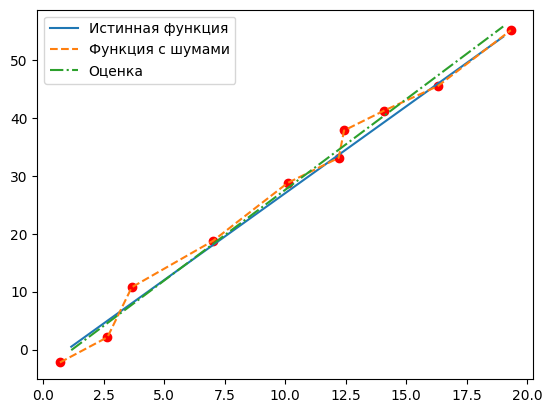

In [394]:
from matplotlib import pyplot as plt

xmin = np.min(true_x)
xmax = np.max(true_x)

plt.scatter(np.sort(x), np.sort(z), color = 'red')
plt.plot([xmin, xmax], [y(xmin),y(xmax)], label = 'Истинная функция')
plt.plot(np.sort(x), np.sort(z), label = 'Функция с шумами', linestyle = '--')
plt.plot(np.sort(true_x), np.sort(y_pred), label = 'Оценка', linestyle = '-.')
plt.legend()


In [395]:
def regressor(x):
   return np.array((1, x))

X  = []
for xi in x:
   X.append(regressor(xi))
X = np.array(X)

lin_Theta = np.linalg.inv(X.T@X)@X.T@z
lin_Theta

array([-3.02980967,  3.05987271])

In [396]:
true_X  = []
for xi in true_x:
   true_X.append(regressor(xi))
true_X = np.array(true_X)
y_mnk_pred = true_X @ lin_Theta

In [397]:
np.sqrt(np.sum((true_z - y_mnk_pred)**2))

2.1918943910486823

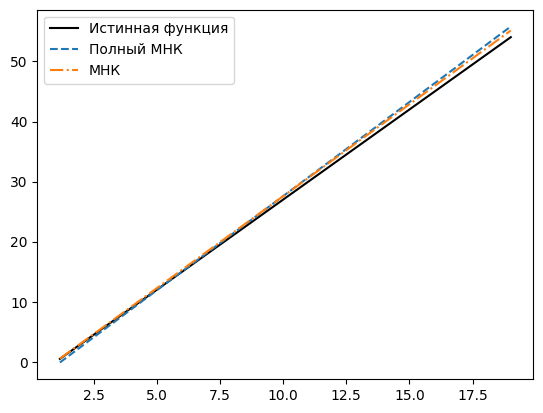

In [402]:
from matplotlib import pyplot as plt

xmin = np.min(true_x)
xmax = np.max(true_x)

plt.plot([xmin, xmax], [y(xmin),y(xmax)], label = 'Истинная функция', color='black')
plt.plot(np.sort(true_x), np.sort(y_pred), label = 'Полный МНК', linestyle = '--')
plt.plot(np.sort(true_x), np.sort(y_mnk_pred), label = 'МНК', linestyle = '-.')
plt.legend()